In [78]:
%pylab inline
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state
from sklearn.neighbors import KNeighborsClassifier

import jsonlines
import ast

Populating the interactive namespace from numpy and matplotlib


ImportError: No module named model_selection

In [84]:
#make usable lists out of the dataset

#initialize lists, in which each index refers to a specific physician
gender = []
region = []
settlement_type = []
specialty = []
years_practicing = []

amoxicillin = []
penicillin = []
ibuprofen = []
codeine = []
morphine = []   #we want to include MORPHINE SULFATE ER and MORPHINE SULFATE in this list
amitriptyline_gabapentin = []

#open .jsonl file
with open('practice_500.jsonl', mode='r') as data:     #mode='r' means reading mode
    for obj in data:
#        print obj    #string
        
        #convert obj string into dictionary of form 
        #{'provider_variables': {'brand_name_rx_count': 0, 'gender': 'M', 'region': 'South', 'settlement_type': 'non-urban', 'specialty': 'General Practice', 'years_practicing': 7, 'generic_rx_count': 103}, 'npi': '1992715205', 
        #'cms_prescription_counts': {'AMOXICILLIN': 52, 'CEPHALEXIN': 23, 'HYDROCODONE-ACETAMINOPHEN': 28}}
        dic = ast.literal_eval(obj)
#        print dic    #dictionary
        
        #update lists
        gender.append(dic['provider_variables']['gender'])
        region.append(dic['provider_variables']['region'])
        settlement_type.append(dic['provider_variables']['settlement_type'])
        specialty.append(dic['provider_variables']['specialty'])
        years_practicing.append(dic['provider_variables']['years_practicing'])
        #for the drugs, add 0 if the drug has never been prescribed
        if 'AMOXICILLIN' in dic['cms_prescription_counts']:
            amoxicillin.append(dic['cms_prescription_counts']['AMOXICILLIN'])
        else:
            amoxicillin.append(0)
        if 'PENICILLIN V POTASSIUM' in dic['cms_prescription_counts']:
            penicillin.append(dic['cms_prescription_counts']['PENICILLIN V POTASSIUM'])
        else:
            penicillin.append(0)
        if 'IBUPROFEN' in dic['cms_prescription_counts']:
            ibuprofen.append(dic['cms_prescription_counts']['IBUPROFEN'])
        else:
            ibuprofen.append(0)
        if 'ACETAMINOPHEN-CODEINE' in dic['cms_prescription_counts']:
            codeine.append(dic['cms_prescription_counts']['ACETAMINOPHEN-CODEINE'])
        else:
            codeine.append(0)
        if 'MORPHINE SULFATE ER' not in dic['cms_prescription_counts']:
            dic['cms_prescription_counts']['MORPHINE SULFATE ER'] = 0
        if 'MORPHINE SULFATE' not in dic['cms_prescription_counts']:
            dic['cms_prescription_counts']['MORPHINE SULFATE'] = 0
        morphine.append(dic['cms_prescription_counts']['MORPHINE SULFATE ER'] + dic['cms_prescription_counts']['MORPHINE SULFATE'])
        if 'AMITRIPTYLINE HCL' not in dic['cms_prescription_counts']:
            dic['cms_prescription_counts']['AMITRIPTYLINE HCL'] = 0
        if 'GABAPENTIN' not in dic['cms_prescription_counts']:
            dic['cms_prescription_counts']['GABAPENTIN'] = 0
        amitriptyline_gabapentin.append(dic['cms_prescription_counts']['AMITRIPTYLINE HCL'] + dic['cms_prescription_counts']['GABAPENTIN'])

In [85]:
#calculate percentages

#define the maximum value of the list as 100%
def replace_list_by_percentages(lst):
    mx = max(lst)
    if mx == 0:
        return lst
    else:
        for i in range(0,len(lst)):
            lst[i] = 100*lst[i]/mx      #percentages already round up/down
        return lst

In [86]:
def seperator(drug,gender,years_practicing):
    arrayM = []
    arrayF = []
    years_M = []
    years_F = []
    for i in range(len(gender)):
        if gender[i] == "M": 
            arrayM.append(drug[i])
            years_M.append(years_practicing[i])
        if gender[i] == "F": 
            arrayF.append(drug[i])
            years_F.append(years_practicing[i])
    return arrayM,arrayF,years_M,years_F

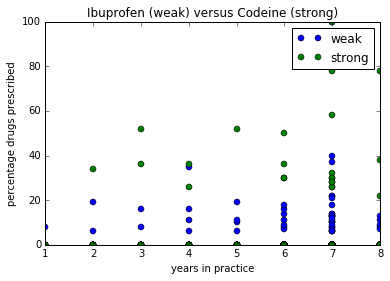

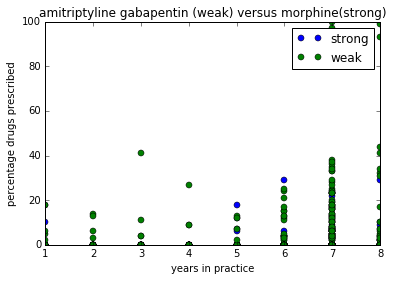

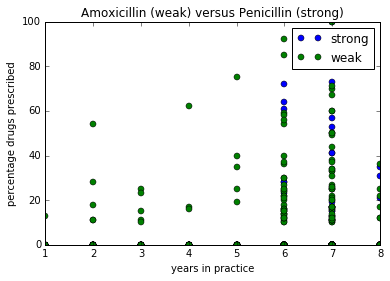

In [87]:
plot(years_practicing,replace_list_by_percentages(ibuprofen), "o", label='weak')
plot(years_practicing,replace_list_by_percentages(codeine), "o", label='strong')
pylab.legend(loc='upper right')
pylab.xlabel('years in practice')
pylab.ylabel('percentage drugs prescribed')
pylab.title('Ibuprofen (weak) versus Codeine (strong)')
plt.show()
plot(years_practicing,replace_list_by_percentages(morphine), "o", label='strong')
plot(years_practicing,replace_list_by_percentages(amitriptyline_gabapentin), "o",  label='weak')
pylab.legend(loc='upper right')
pylab.xlabel('years in practice')
pylab.ylabel('percentage drugs prescribed')
pylab.title('amitriptyline gabapentin (weak) versus morphine(strong)')
pylab.legend(loc='upper right')
plt.show()
plot(years_practicing,replace_list_by_percentages(penicillin), "o", label='strong')
plot(years_practicing,replace_list_by_percentages(amoxicillin), "o",  label='weak')
pylab.legend(loc='upper right')
pylab.xlabel('years in practice')
pylab.ylabel('percentage drugs prescribed')
pylab.title('Amoxicillin (weak) versus Penicillin (strong)')
pylab.legend(loc='upper right')
plt.show()

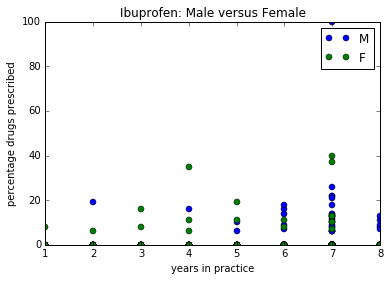

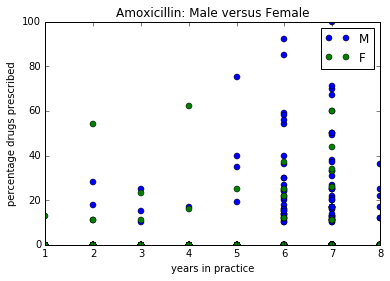

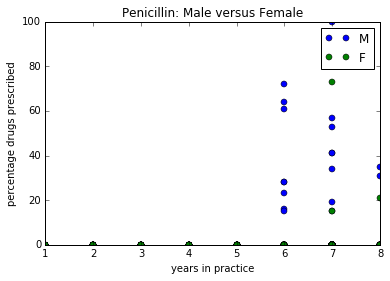

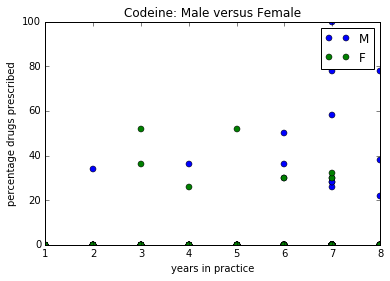

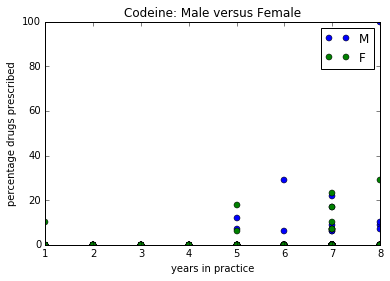

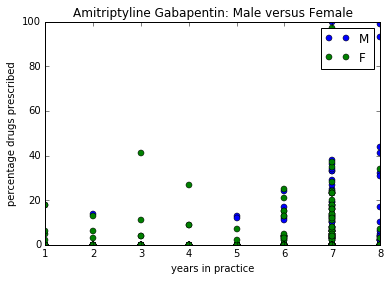

In [88]:
plot(seperator(ibuprofen,gender,years_practicing)[2],
     seperator(ibuprofen,gender,years_practicing)[0], "o", label='M')
plot(seperator(ibuprofen,gender,years_practicing)[3],
     seperator(ibuprofen,gender,years_practicing)[1], "o",  label='F')
pylab.legend(loc='upper right')
pylab.xlabel('years in practice')
pylab.ylabel('percentage drugs prescribed')
pylab.title('Ibuprofen: Male versus Female')
plt.show()
plot(seperator(amoxicillin,gender,years_practicing)[2],
     seperator(amoxicillin,gender,years_practicing)[0], "o", label='M')
plot(seperator(amoxicillin,gender,years_practicing)[3],
     seperator(amoxicillin,gender,years_practicing)[1], "o",  label='F')
pylab.legend(loc='upper right')
pylab.xlabel('years in practice')
pylab.ylabel('percentage drugs prescribed')
pylab.title('Amoxicillin: Male versus Female')
plt.show()
plot(seperator(penicillin,gender,years_practicing)[2],
     seperator(penicillin,gender,years_practicing)[0], "o", label='M')
plot(seperator(penicillin,gender,years_practicing)[3],
     seperator(penicillin,gender,years_practicing)[1], "o",  label='F')
pylab.legend(loc='upper right')
pylab.xlabel('years in practice')
pylab.ylabel('percentage drugs prescribed')
pylab.title('Penicillin: Male versus Female')
plt.show()
plot(seperator(codeine,gender,years_practicing)[2],
     seperator(codeine,gender,years_practicing)[0], "o", label='M')
plot(seperator(codeine,gender,years_practicing)[3],
     seperator(codeine,gender,years_practicing)[1], "o",  label='F')
pylab.legend(loc='upper right')
pylab.xlabel('years in practice')
pylab.ylabel('percentage drugs prescribed')
pylab.title('Codeine: Male versus Female')
plt.show()
plot(seperator(morphine,gender,years_practicing)[2],
     seperator(morphine,gender,years_practicing)[0], "o", label='M')
plot(seperator(morphine,gender,years_practicing)[3],
     seperator(morphine,gender,years_practicing)[1], "o",  label='F')
pylab.legend(loc='upper right')
pylab.xlabel('years in practice')
pylab.ylabel('percentage drugs prescribed')
pylab.title('Codeine: Male versus Female')
plt.show()
plot(seperator(amitriptyline_gabapentin,gender,years_practicing)[2],
     seperator(amitriptyline_gabapentin,gender,years_practicing)[0], "o", label='M')
plot(seperator(amitriptyline_gabapentin,gender,years_practicing)[3],
     seperator(amitriptyline_gabapentin,gender,years_practicing)[1], "o",  label='F')
pylab.legend(loc='upper right')
pylab.xlabel('years in practice')
pylab.ylabel('percentage drugs prescribed')
pylab.title('Amitriptyline Gabapentin: Male versus Female')
plt.show()

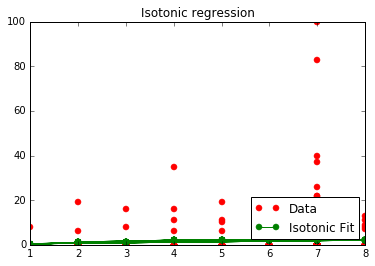

In [89]:
# isotonic regression

x = years_practicing
y = replace_list_by_percentages(ibuprofen)
n = len(years_practicing)
ir = IsotonicRegression()

y_ = ir.fit_transform(x, y)

#lr = LinearRegression()
#lr.fit(x[:, np.newaxis], y)

segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(0.5 * np.ones(n))

fig = plt.figure()
plt.plot(x, y, 'r.', markersize=12)
plt.plot(x, y_, 'g.-', markersize=12)
#plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.gca().add_collection(lc)
plt.legend(('Data', 'Isotonic Fit'), loc='lower right')
plt.title('Isotonic regression')
plt.show()

In [ ]:
# K-Nearest Neighbor classification

x = years_practicing
y = replace_list_by_percentages(ibuprofen)

n_neighbors = 3

neigh = KNeighborsClassifier(n_neighbors)
neigh.fit(x, y)
neigh.kneighbors_graph([x, n_neighbors])